In [26]:
import pandas as pd
import numpy as np

In [27]:
life = pd.read_csv("Life-Expectancy-Data-Updated.csv")

In [28]:
life.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [29]:
features=["Infant_deaths", "Under_five_deaths", "Adult_mortality" ,"Alcohol_consumption" , "Population_mln", "Life_expectancy"]

In [30]:
life = life.dropna(subset=features)

In [31]:
data = life[features].copy()

In [32]:
data

,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Population_mln,Life_expectancy
0,11.1,13.0,105.8240,1.320,78.53,76.5
1,2.7,3.3,57.9025,10.350,46.44,82.8
2,51.5,67.9,201.0765,1.570,1183.21,65.4
3,32.8,40.5,222.1965,5.680,0.75,67.0
4,3.4,4.3,57.9510,2.890,7.91,81.7
...,...,...,...,...,...,...
2859,97.0,224.9,291.8240,0.092,11.33,49.9
2860,23.9,28.6,235.2330,6.560,2.67,66.9
2861,17.7,28.9,134.8950,1.560,19.39,74.3
2862,7.9,9.9,204.0120,11.000,3.44,71.8


In [33]:
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [34]:
data.describe()

,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Population_mln,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2.886090,2.643057,2.919187,3.427976,1.238707,6.970826
std,1.818364,1.802020,1.543625,2.005458,0.890267,1.906542
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.415994,1.298181,1.772768,1.604365,1.013160,5.722973
50%,2.175348,1.840970,2.537543,3.024622,1.050682,7.486486
75%,4.007704,3.575472,3.651834,4.917040,1.153987,8.297297
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [35]:
data.head()

,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Population_mln,Life_expectancy
0,1.614087,1.432615,1.758176,1.664801,1.511712,8.520270
1,1.059428,1.040431,1.114432,6.212647,1.302396,9.797297
2,4.281731,3.652291,3.037732,1.790711,8.717296,6.270270
3,3.046955,2.544474,3.321443,3.860660,1.004370,6.594595
4,1.105649,1.080863,1.115083,2.455512,1.051073,9.574324


In [36]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [37]:
centroids = random_centroids(data, 6)

C:\Users\HP\AppData\Local\Temp\ipykernel_12152\1845334667.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


In [38]:
centroids

,0,1,2,3,4,5
Infant_deaths,1.112252,2.756420,1.911225,4.182685,1.581071,4.829787
Under_five_deaths,1.315364,1.056604,4.048518,1.088949,1.044474,3.583558
Adult_mortality,4.063647,1.355922,1.247300,3.341956,4.342925,3.502780
Alcohol_consumption,3.754896,7.295467,2.510912,1.589256,1.956911,6.927812
Population_mln,1.001370,1.042855,1.077621,1.034766,1.012719,1.069989
Life_expectancy,6.148649,5.804054,7.912162,7.810811,7.831081,7.425676


In [39]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [40]:
labels = get_labels(data, centroids)

In [41]:
labels.value_counts()

3    755
1    504
0    497
2    479
4    334
5    295
Name: count, dtype: int64

In [42]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [43]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [44]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

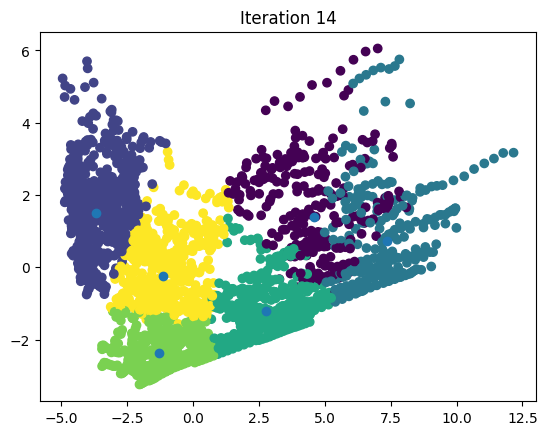

In [48]:
max_iterations = 100
k = 6

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, k)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [49]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

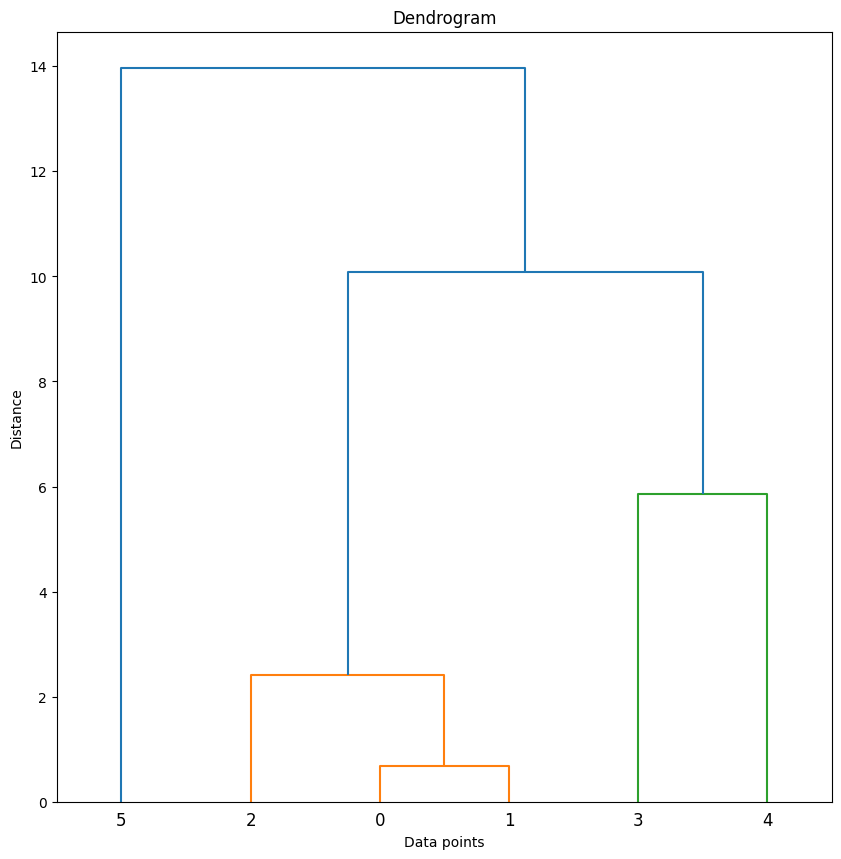

In [63]:
Z = linkage(centroids, 'ward')
fig = plt.figure(figsize=(10,10))
dn = dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()
